In [1]:
import os, sys
from pathlib import Path

# 1) 프로젝트 루트로 이동 (경로는 네 환경에 맞게)
project_root = Path("/home/minkyukim/ML_AL_Project")
os.chdir(project_root)

# 2) 프로젝트 루트를 import path에 추가
if str(project_root) not in sys.path:
    sys.path.append(str(project_root))

# 3) .env 로드
from dotenv import load_dotenv
load_dotenv()  # ML_AL_Project/.env 안의 GOOGLE_API_KEY 읽어옴

print("CWD:", os.getcwd())
print("GOOGLE_API_KEY 존재 여부:", "YES" if os.getenv("GOOGLE_API_KEY") else "NO")


CWD: /home/minkyukim/ML_AL_Project
GOOGLE_API_KEY 존재 여부: YES


In [1]:
import autorootcwd  # repo 루트로 CWD를 맞춰줌 (ML_AL_Project)
from pathlib import Path
import sys
from dotenv import load_dotenv
import os

# 현재 작업 디렉토리(=프로젝트 루트) 확인
project_root = Path(".").resolve()
print("프로젝트 루트:", project_root)

# sys.path에 루트 추가 (중복 방지)
if str(project_root) not in sys.path:
    sys.path.append(str(project_root))

# .env 로드 (GOOGLE_API_KEY 등)
load_dotenv()
print("GOOGLE_API_KEY 존재 여부:", "YES" if os.getenv("GOOGLE_API_KEY") else "NO")


프로젝트 루트: /home/minkyukim/ML_AL_Project
GOOGLE_API_KEY 존재 여부: YES


In [5]:
from med_agent_full.agents.segment_agent.segmentation_agent import SegmentationAgent



In [3]:
from med_agent_full.agents.phase_finding_agent import PhaseFindingAgent
from med_agent_full.agents.report_draft_agent import ReportDraftAgent
from med_agent_full.agents.report_finalizer_agent import ReportFinalizerAgent

/home/minkyukim/anaconda3/envs/mlal/lib/python3.10/site-packages/google/api_core/_python_version_support.py:266: FutureWarning: You are using a Python version (3.10.19) which Google will stop supporting in new releases of google.api_core once it reaches its end of life (2026-10-04). Please upgrade to the latest Python version, or at least Python 3.11, to continue receiving updates for google.api_core past that date.
  warnings.warn(message, FutureWarning)
/home/minkyukim/anaconda3/envs/mlal/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
DEFAULT_DATA_ROOT = "/mnt/sda/minkyukim/CoMed-sam_dataset/IVDM_/ivdm_npy_test_dataset_1024image"

def run_pipeline_in_notebook(
    file_prefix: str,
    data_root: str = DEFAULT_DATA_ROOT,
):
    """
    노트북에서 호출하는 IVDM multi-agent 파이프라인.
    
    반환:
      seg_output: segmentation agent 결과(dict)
      phase_findings: phase별 소견(dict)
      draft_report: 초안 리포트(str)
      final_report: 최종 리포트(str)
    """
    # 1. Segmentation
    seg_agent = SegmentationAgent(data_root=data_root)
    seg_output = seg_agent.run(file_prefix=file_prefix)

    if seg_output is None:
        raise RuntimeError(f"Segmentation failed or no matching files for prefix {file_prefix}")

    # 2. Phase별 소견
    phase_agent = PhaseFindingAgent()
    phase_findings = phase_agent.run(seg_output)

    # 3. 초안 리포트
    draft_agent = ReportDraftAgent()
    draft_report = draft_agent.run(seg_output, phase_findings)

    # 4. 최종 리포트
    final_agent = ReportFinalizerAgent()
    final_report = final_agent.run(draft_report)

    return seg_output, phase_findings, draft_report, final_report


In [7]:
seg_output, phase_findings, draft_report, final_report = run_pipeline_in_notebook("15-13")


[SegmentationAgent] Inference completed for: /mnt/sda/minkyukim/CoMed-sam_dataset/IVDM_/ivdm_npy_test_dataset_1024image/gts/15-13_1.npy
[SegmentationAgent] Inference completed for: /mnt/sda/minkyukim/CoMed-sam_dataset/IVDM_/ivdm_npy_test_dataset_1024image/gts/15-13_2.npy
[SegmentationAgent] Inference completed for: /mnt/sda/minkyukim/CoMed-sam_dataset/IVDM_/ivdm_npy_test_dataset_1024image/gts/15-13_3.npy
[SegmentationAgent] Inference completed for: /mnt/sda/minkyukim/CoMed-sam_dataset/IVDM_/ivdm_npy_test_dataset_1024image/gts/15-13_4.npy
[SegmentationAgent] Inference completed for: /mnt/sda/minkyukim/CoMed-sam_dataset/IVDM_/ivdm_npy_test_dataset_1024image/gts/15-13_5.npy
[SegmentationAgent] Inference completed for: /mnt/sda/minkyukim/CoMed-sam_dataset/IVDM_/ivdm_npy_test_dataset_1024image/gts/15-13_6.npy
[SegmentationAgent] Inference completed for: /mnt/sda/minkyukim/CoMed-sam_dataset/IVDM_/ivdm_npy_test_dataset_1024image/gts/15-13_7.npy
[SegmentationAgent] Saved Final GT Mask: ablatio

In [8]:
print("===== [Phase별 소견] =====")
for phase, text in phase_findings.items():
    print(f"\n[ {phase} ]\n{text}")

print("\n\n===== [초안 리포트] =====\n")
print(draft_report)

print("\n\n===== [최종 리포트] =====\n")
print(final_report)


===== [Phase별 소견] =====

[ WAT ]
[Phase: WAT]
- 신호 특성: 척추뼈, 디스크, 주변 연부 조직의 신호 강도가 전반적으로 낮게 나타남. 특히 디스크의 경우, 정상적인 수분 함량보다 낮은 신호 강도를 보여 탈수 소견이 의심됨.
- 의심되는 이상 소견: 여러 척추 분절에서 디스크의 높이 감소가 관찰되며, 디스크 변성 및 추간판 탈출증의 가능성이 있음. 척추체 후방으로 돌출된 디스크 물질이 신경근을 압박할 가능성도 고려해야 함. 척추 주변 연부 조직의 신호 강도 변화는 염증 또는 부종을 시사할 수 있음.
- 추가적으로 확인이 필요한 부분: 다른 위상(T1, T2 등)의 영상을 함께 검토하여 디스크의 탈수 정도, 연부 조직의 부종 및 염증 여부를 판단하고, 조영 증강 효과를 확인하여 감별 진단에 도움을 받을 필요가 있음. 또한 axial 영상을 통해 척추관 협착 여부 및 신경근 압박 정도를 추가적으로 평가해야 함.


[ FAT ]
[Phase: FAT]
- 신호 특성: 척추체의 골수에서 정상적인 지방 신호 강도가 관찰됩니다. 디스크의 신호 강도는 전반적으로 낮게 보입니다.
- 의심되는 이상 소견: 일부 추간판에서 퇴행성 변화가 의심됩니다. 척추체 높이 감소는 보이지 않습니다.
- 추가적으로 확인이 필요한 부분: 다른 위상(예: T1, T2) 영상에서 추간판의 수분 함량 변화 및 섬유륜 파열 여부 등을 확인해야 합니다. 필요하다면 조영 증강 영상을 통해 염증 여부를 확인할 수 있습니다.

[ INN ]
[Phase: INN]
- 신호 특성: 척추체는 전반적으로 균일한 중간 정도의 신호 강도를 보입니다. 디스크는 척추체에 비해 약간 높은 신호 강도를 나타냅니다. 경막외 공간 (epidural space)의 신호 강도는 비교적 낮게 보입니다.

- 의심되는 이상 소견:
  * 몇몇 디스크에서 돌출 (protrusion) 또는 탈출 (extrusion)이 의심됩니다. 특히 하위 요추부에서 더 두드러져 보입니다. 이러한 디스크 이상은 경막

Overlay on predicted: ablation_images/15-13_dice_0.8767/overlay_on_predicted.png


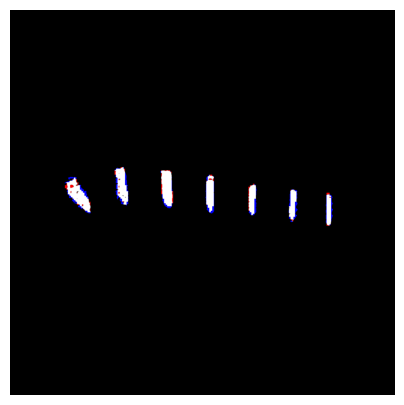

In [9]:
from PIL import Image
import matplotlib.pyplot as plt

overlay_path = seg_output["masks"]["overlay_on_predicted"]
print("Overlay on predicted:", overlay_path)

img = Image.open(overlay_path)
plt.figure(figsize=(5, 5))
plt.imshow(img)
plt.axis("off")
plt.show()


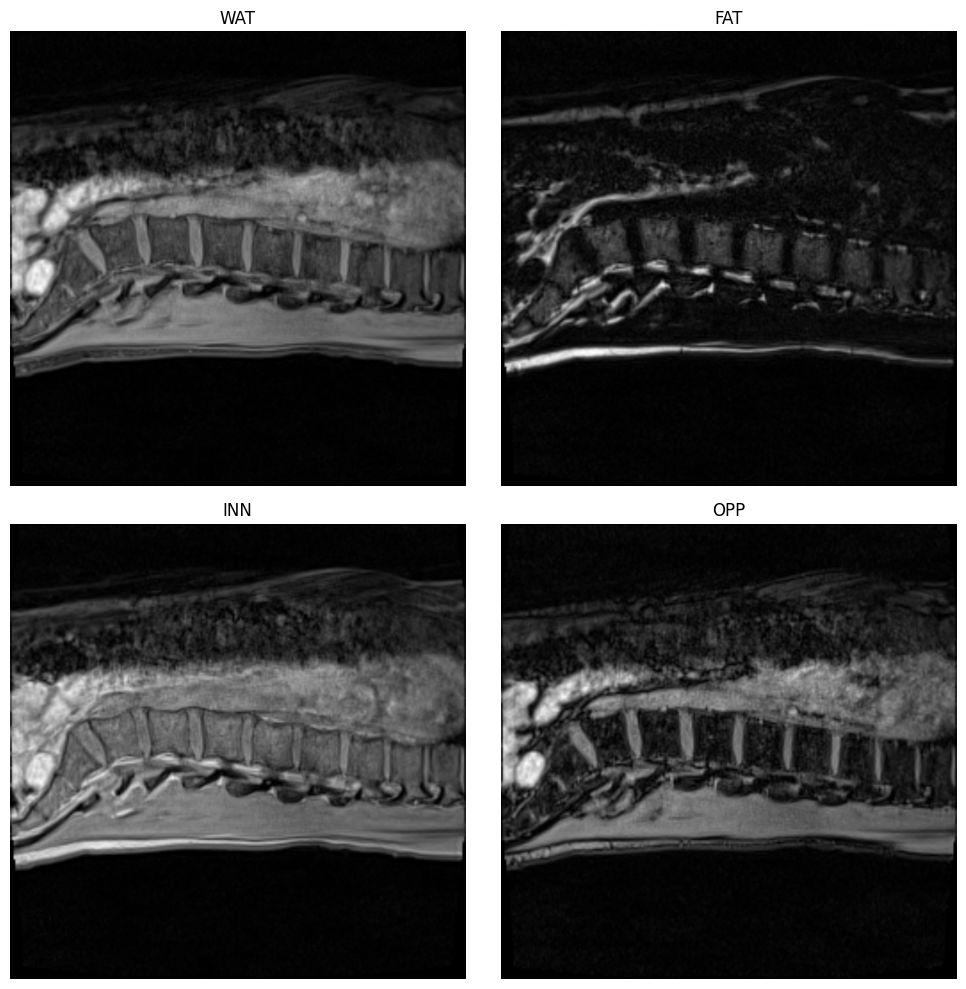

In [10]:
phase_imgs = seg_output["phase_images"]  # {"WAT": path, "FAT": path, ...}

plt.figure(figsize=(10, 10))
for i, (phase, path) in enumerate(phase_imgs.items(), start=1):
    img = Image.open(path)
    plt.subplot(2, 2, i)
    plt.imshow(img, cmap="gray")
    plt.title(phase)
    plt.axis("off")
plt.tight_layout()
plt.show()
